In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
fh = '/Users/henrycosentino/Desktop/Python/Projects/Jobs Report/monthly_jobs_data_pulls.xlsx'

# Data frame of monthly jobs report data and 2YR and 10YR yield changes on the same day
jobs_df = pd.read_excel(fh, sheet_name='Release Values', parse_dates=True)

# Data frame of daily 10YR yield from same time period as above data frame
ten_yr_df = pd.read_excel(fh, sheet_name='10Y Daily Values', parse_dates=True)

In [6]:
# Starting with data exploration on the 10YR Daily data frame

ten_yr_df.head()

,Date,10YR Yield
0,2000-01-06,6.524
1,2000-01-07,6.515
2,2000-01-10,6.552
3,2000-01-11,6.657
4,2000-01-12,6.703


In [7]:
# Create daily bps change column

ten_yr_df['10yr daily bps change'] = (ten_yr_df['10YR Yield'] - ten_yr_df['10YR Yield'].shift(1)) * 100
ten_yr_df = ten_yr_df[['Date', '10yr daily bps change']].dropna().reset_index(drop=True)
ten_yr_df.head()

,Date,10yr daily bps change
0,2000-01-07,-0.9
1,2000-01-10,3.7
2,2000-01-11,10.5
3,2000-01-12,4.6
4,2000-01-13,-7.3


In [8]:
# Looking at statistics

ten_yr_df.describe()

,Date,10yr daily bps change
count,6452,6452.000000
mean,2012-05-23 06:14:57.210167296,-0.039628
min,2000-01-07 00:00:00,-47.360000
25%,2006-03-19 06:00:00,-3.490000
50%,2012-05-23 12:00:00,0.000000
75%,2018-07-30 06:00:00,3.402500
max,2024-10-04 00:00:00,36.020000
std,NaN,5.883026


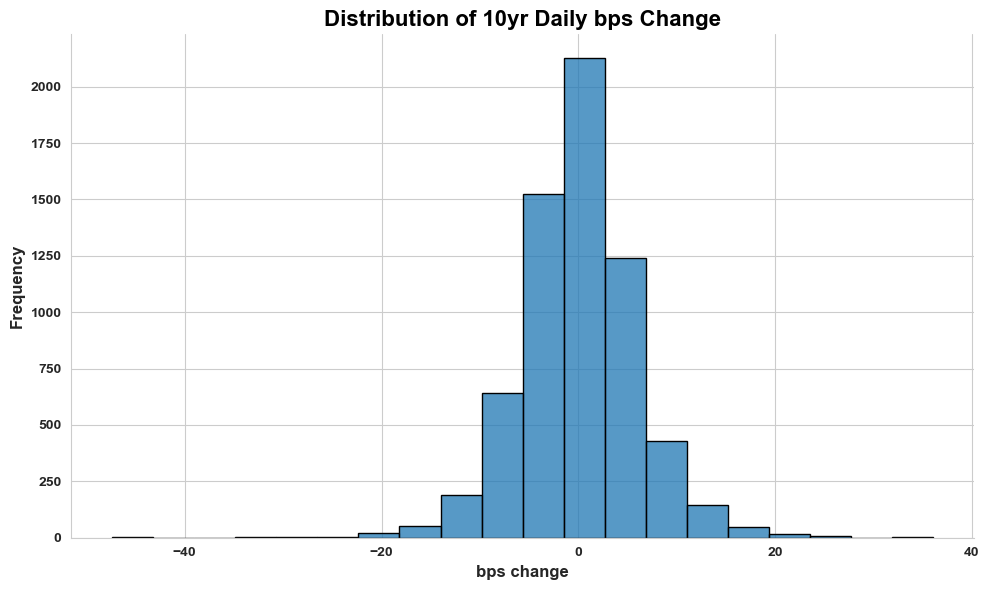

In [9]:
# Plotting histogram of 10YR Daily bps Change 

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(ten_yr_df['10yr daily bps change'], bins=20, edgecolor='black')

plt.title("Distribution of 10yr Daily bps Change", fontsize=16, fontweight='bold', color='black')
plt.xlabel("bps change", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

sns.despine()

plt.tight_layout()
#  plt.savefig('/Users/henrycosentino/Desktop/10yr Graph.png', dpi=300)
plt.show()

In [10]:
# Moving on to data exploration for monthly jobs data release

jobs_df.head()

,Actual Release Date,NFP Survey Delta,UE Survey Delta,10YR bps Delta,2YR bps Delta
0,2000-01-07,69,-0.001,-1,1
1,2000-02-04,-32,0.000,6,10
2,2000-03-03,-102,0.001,0,-2
3,2000-04-07,104,0.000,-8,-3
4,2000-05-05,-61,-0.002,8,7


In [11]:
# Looking at statistics

jobs_df.describe()

,Actual Release Date,NFP Survey Delta,UE Survey Delta,10YR bps Delta,2YR bps Delta
count,298,298.000000,298.000000,298.000000,298.000000
mean,2012-05-20 12:09:39.865771776,37.865772,-0.000678,0.664430,0.194631
min,2000-01-07 00:00:00,-1311.000000,-0.058000,-20.000000,-28.000000
25%,2006-03-17 00:00:00,-68.750000,-0.001000,-5.000000,-3.750000
50%,2012-05-18 00:00:00,4.000000,0.000000,0.500000,0.000000
75%,2018-07-27 00:00:00,69.000000,0.001000,7.000000,3.000000
max,2024-10-04 00:00:00,10119.000000,0.006000,26.000000,34.000000
std,NaN,615.219631,0.003947,7.822191,8.044638


In [12]:
# Transforming into a %

jobs_df['UE Survey Delta (%)'] = jobs_df['UE Survey Delta'] * 100
jobs_df = jobs_df.drop(columns='UE Survey Delta')
jobs_df

,Actual Release Date,NFP Survey Delta,10YR bps Delta,2YR bps Delta,UE Survey Delta (%)
0,2000-01-07,69,-1,1,-0.1
1,2000-02-04,-32,6,10,0.0
2,2000-03-03,-102,0,-2,0.1
3,2000-04-07,104,-8,-3,0.0
4,2000-05-05,-61,8,7,-0.2
...,...,...,...,...,...
293,2024-06-07,36,15,16,0.1
294,2024-07-05,-72,-8,-10,0.1
295,2024-08-02,-31,-19,-27,0.2
296,2024-09-06,-6,-2,-10,0.0


In [13]:
# Grouping the UE Data

ue_df = jobs_df[['Actual Release Date', 'UE Survey Delta (%)', '10YR bps Delta']]

# Positive UE Survey Delta means the unemployment rate was higher than surveyed by Wall Street
# Negative UE Survey Delta means the unemployment rate was lower than surveyed by Wall Street

bins = [-np.inf, -0.4, -0.3, -0.2, -0.1,0, 0.1, 0.2, 0.3, 0.4, np.inf]
ue_df['UE Survey Delta (%) Binned'] = pd.cut(ue_df['UE Survey Delta (%)'], bins=bins)
ue_grouped = ue_df.groupby(ue_df['UE Survey Delta (%) Binned'])
ue_grouped_10yr = ue_grouped['10YR bps Delta']
ue_grouped_10yr.agg(['mean','median','std','count']).round(2)

/var/folders/9v/qgzcp2p135g276cx3j394s500000gn/T/ipykernel_3851/4034177839.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ue_df['UE Survey Delta (%) Binned'] = pd.cut(ue_df['UE Survey Delta (%)'], bins=bins)
/var/folders/9v/qgzcp2p135g276cx3j394s500000gn/T/ipykernel_3851/4034177839.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ue_grouped = ue_df.groupby(ue_df['UE Survey Delta (%) Binned'])


,mean,median,std,count
UE Survey Delta (%) Binned,,,,
"(-inf, -0.4]",1.80,3.0,5.78,15
"(-0.4, -0.3]",2.10,3.0,6.77,10
"(-0.3, -0.2]",-0.71,-1.0,8.32,41
"(-0.2, -0.1]",0.80,1.0,8.51,76
"(-0.1, 0.0]",0.60,0.0,7.37,73
"(0.0, 0.1]",0.29,-2.0,6.75,49
"(0.1, 0.2]",2.57,3.0,10.23,23
"(0.2, 0.3]",-1.62,-1.5,7.17,8
"(0.3, 0.4]",7.00,7.0,1.41,2


In [14]:
# Grouping Nonfarm Payrolls Data

nfp_df = jobs_df[['Actual Release Date', 'NFP Survey Delta', '10YR bps Delta','2YR bps Delta']]

# Positive NFP Survey Delta means the Change in NFP was higher than surveyed by Wall Street --> Good sign --> Positive Growth --> Rise in rates
# Negative NFP Survey Delta means the Change in NFP was lower than surveyed by Wall Street --> Bad sign --> Negative Growth --> Decline in rates

bins = [-np.inf, -300, -250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250, 300, np.inf]
nfp_df['NFP Survey Delta Binned'] = pd.cut(nfp_df['NFP Survey Delta'], bins=bins)
nfp_grouped = nfp_df.groupby(nfp_df['NFP Survey Delta Binned'])
nfp_grouped_10yr = nfp_grouped[['10YR bps Delta','2YR bps Delta']]
grouped_agg_nfp_df = pd.DataFrame(nfp_grouped_10yr.agg(['mean', 'median', 'count']).round(2))

/var/folders/9v/qgzcp2p135g276cx3j394s500000gn/T/ipykernel_3851/673295000.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nfp_grouped = nfp_df.groupby(nfp_df['NFP Survey Delta Binned'])


In [15]:
# Creating two separate data frames: 10YR and 2YR

grouped_agg_10yr = grouped_agg_nfp_df['10YR bps Delta']
grouped_agg2yr = grouped_agg_nfp_df['2YR bps Delta']
grouped_agg2yr

,mean,median,count
NFP Survey Delta Binned,,,
"(-inf, -300.0]",0.00,-1.0,5
"(-300.0, -250.0]",-1.40,0.0,5
"(-250.0, -200.0]",5.00,3.0,3
"(-200.0, -150.0]",-5.62,-6.5,16
"(-150.0, -100.0]",-3.75,-4.0,24
"(-100.0, -50.0]",-2.44,-2.0,39
"(-50.0, 0.0]",-0.37,0.5,54
"(0.0, 50.0]",0.70,0.0,57
"(50.0, 100.0]",1.18,1.0,45


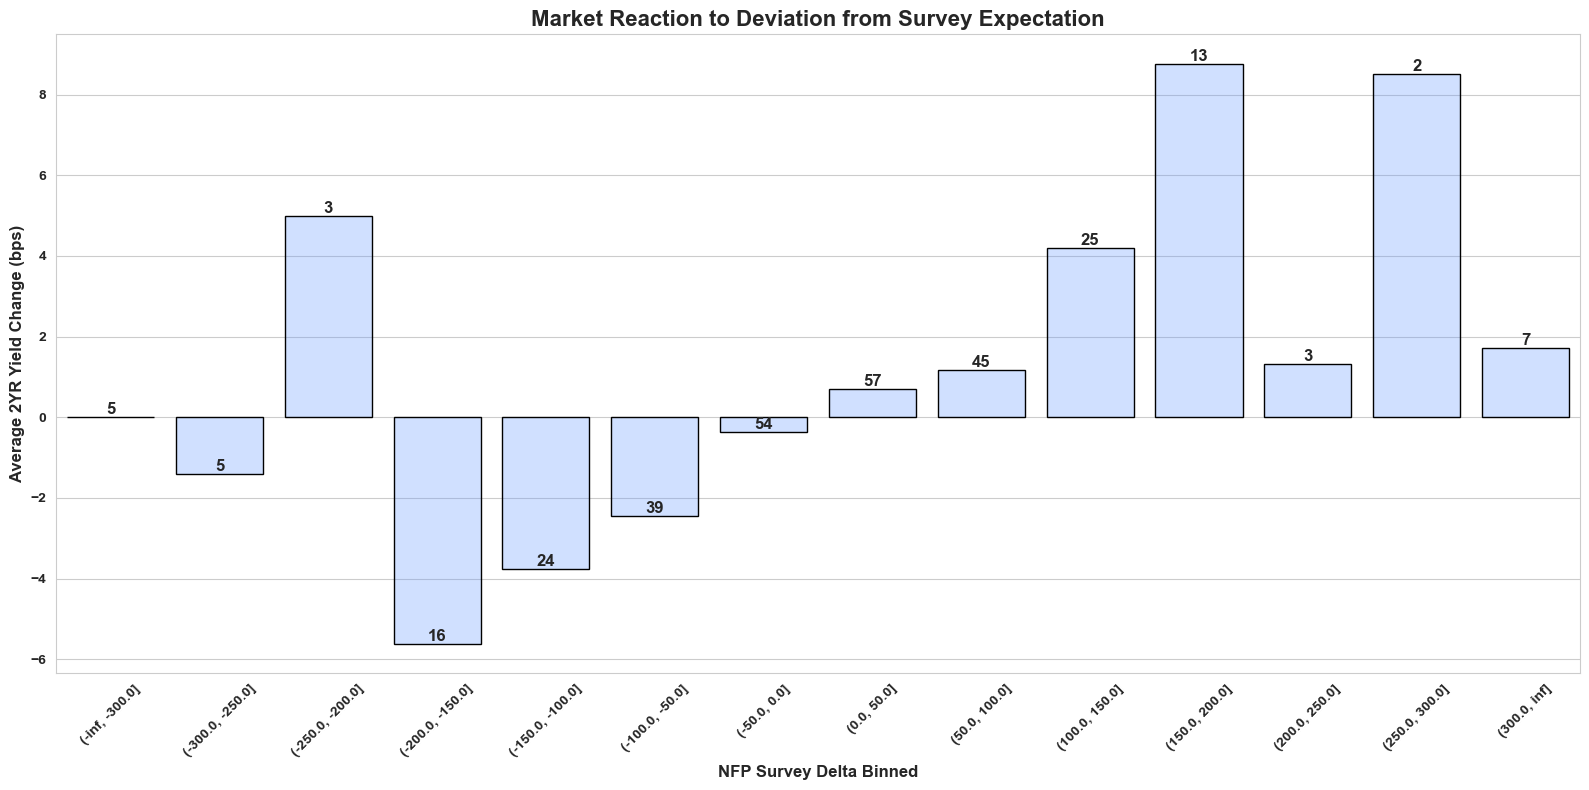

In [16]:
# Graphing Grouped Nonfarm Payrolls Data for 2YR Yield Change (bps)

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=grouped_agg2yr, x=grouped_agg2yr.index, y='mean')

# Recolor & outline Bars
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_facecolor((0.4, 0.6, 1, 0.3))

# Annotate counts on top of each bar
for i, (mean, count) in enumerate(zip(grouped_agg2yr['mean'], grouped_agg2yr['count'])):
    ax.text(i, mean, f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Title & label axis
plt.title("Market Reaction to Deviation from Survey Expectation", fontsize=16, fontweight='bold')
plt.xlabel("NFP Survey Delta Binned", fontsize=12, fontweight='bold')
plt.ylabel('Average 2YR Yield Change (bps)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
## plt.savefig('/Users/henrycosentino/Desktop/2YR Average BPS Change NFP Graph.png', dpi=300)
plt.show()

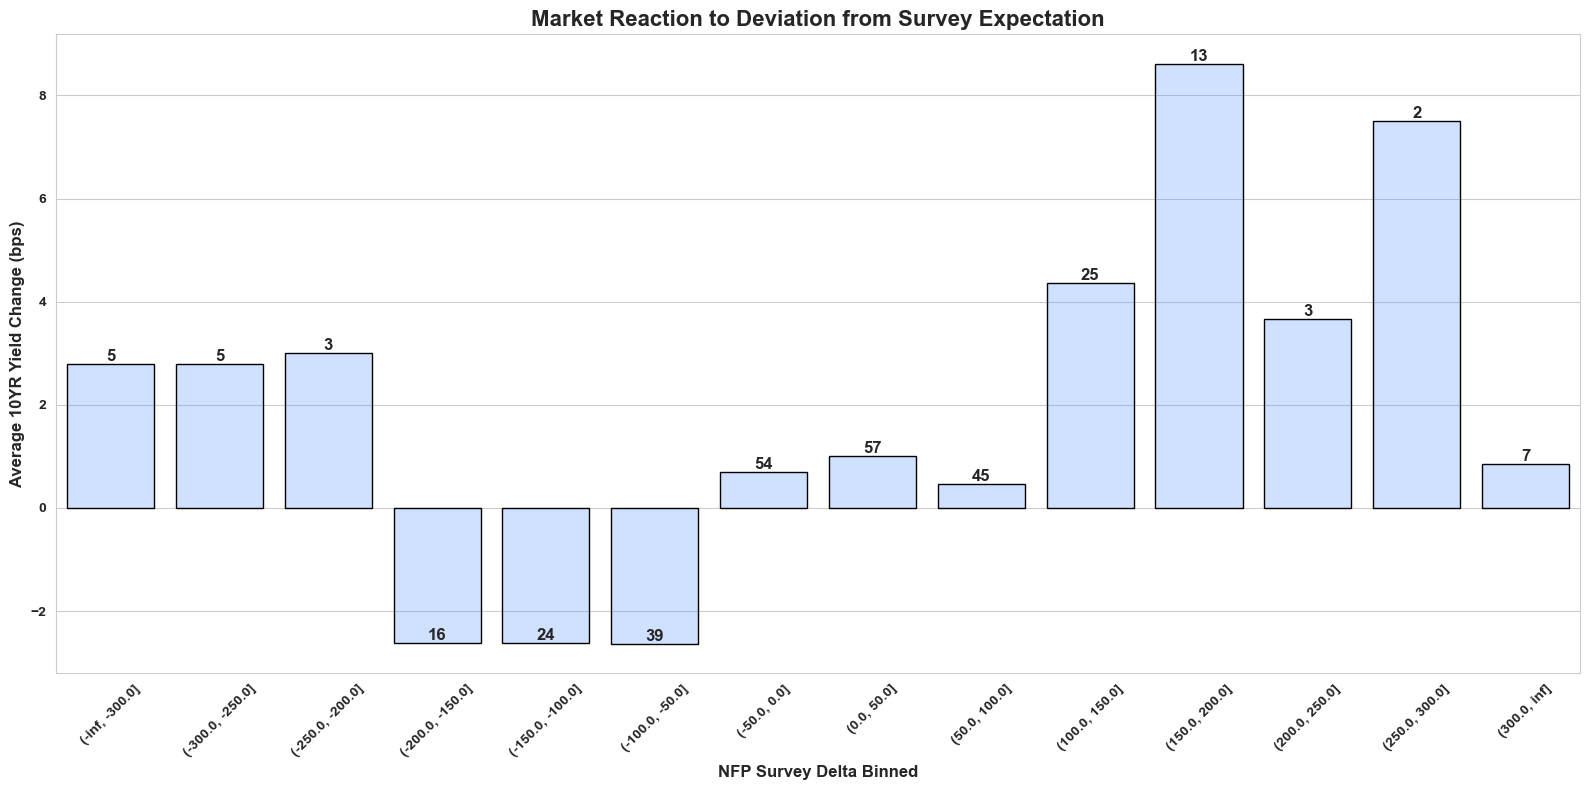

In [17]:
# Graphing Grouped Nonfarm Payrolls Data for 2YR Yield Change (bps)

plt.figure(figsize=(16, 8))
ax = sns.barplot(data=grouped_agg_10yr, x=grouped_agg_10yr.index, y='mean')

# Recolor & outline Bars
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_facecolor((0.4, 0.6, 1, 0.3))

# Annotate counts on top of each bar
for i, (mean, count) in enumerate(zip(grouped_agg_10yr['mean'], grouped_agg_10yr['count'])):
    ax.text(i, mean, f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Title & label axis
plt.title("Market Reaction to Deviation from Survey Expectation", fontsize=16, fontweight='bold')
plt.xlabel("NFP Survey Delta Binned", fontsize=12, fontweight='bold')
plt.ylabel('Average 10YR Yield Change (bps)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.tight_layout()
## plt.savefig('/Users/henrycosentino/Desktop/10YR Average BPS Change NFP Graph.png', dpi=300)
plt.show()